# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [108]:
# Import numpy and pandas
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:

sensor.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

In [15]:
sensor.notnull().sum()

attitude.roll         1751
attitude.pitch        1751
attitude.yaw          1751
gravity.x             1751
gravity.y             1751
gravity.z             1751
rotationRate.x        1751
rotationRate.y        1751
rotationRate.z        1751
userAcceleration.x    1751
userAcceleration.y    1751
userAcceleration.z    1751
dtype: int64

How many rows and columns are in our data?

In [10]:
# Your code here:

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [30]:
# Your code here:

indice=pd.date_range("1/1/2018 00:00:00", "2018-01-01 00:29:00", periods=len(sensor))
indice.freq=pd.infer_freq(indice)
sensor=sensor.set_index(indice)
sensor.index

DatetimeIndex([          '2018-01-01 00:00:00',
               '2018-01-01 00:00:00.994285714',
               '2018-01-01 00:00:01.988571428',
               '2018-01-01 00:00:02.982857142',
               '2018-01-01 00:00:03.977142857',
               '2018-01-01 00:00:04.971428571',
               '2018-01-01 00:00:05.965714285',
                  '2018-01-01 00:00:06.960000',
               '2018-01-01 00:00:07.954285714',
               '2018-01-01 00:00:08.948571428',
               ...
               '2018-01-01 00:28:51.051428571',
               '2018-01-01 00:28:52.045714285',
                  '2018-01-01 00:28:53.040000',
               '2018-01-01 00:28:54.034285714',
               '2018-01-01 00:28:55.028571428',
               '2018-01-01 00:28:56.022857142',
               '2018-01-01 00:28:57.017142857',
               '2018-01-01 00:28:58.011428571',
               '2018-01-01 00:28:59.005714285',
                         '2018-01-01 00:29:00'],
              dtype=

Assign the time series index to the dataframe's index.

In [36]:
# Your code here:

sensor.set_index(indice, inplace=True)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00.000000000,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:00.994285714,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:01.988571428,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:02.982857142,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:03.977142857,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [46]:
sensor.rename(columns={"userAcceleration.x":"userAcceleration", "rotationRate.x":"rotationRate"}, inplace=True)

In [44]:
# Your code here:

res = seasonal_decompose(sensor.userAcceleration, model="additive", freq=60)

<ipython-input-44-5aa27b2548d6>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(sensor.userAcceleration, model="additive", freq=60)


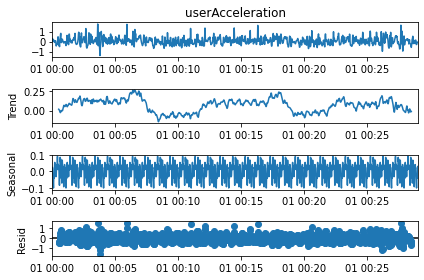

In [45]:
res.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<ipython-input-53-cb5ed896c0e9>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(sensor.rotationRate, model="additive", freq=60)


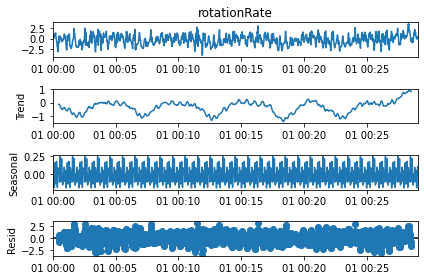

In [53]:
# Your code here:

res = seasonal_decompose(sensor.rotationRate, model="additive", freq=60)
res.plot();

Let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

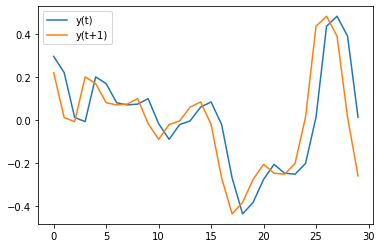

In [55]:
# Your code here:
data_t = sensor["userAcceleration"][:-1]
data_t_plus_1 = sensor["userAcceleration"][1:]
plt.plot(data_t[:30].values, label="y(t)")
plt.plot(data_t_plus_1[:30].values, label="y(t+1)")
plt.legend();

In [58]:
np.corrcoef(data_t, data_t_plus_1)

array([[1.        , 0.75970362],
       [0.75970362, 1.        ]])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

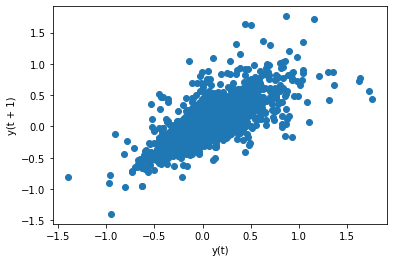

In [113]:
pd.plotting.lag_plot(sensor["userAcceleration"], lag=1)

No handles with labels found to put in legend.


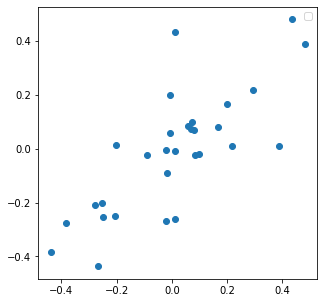

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(data_t[:30], data_t_plus_1[:30])
plt.legend();

Create a lag plot for `rotationRate.x`

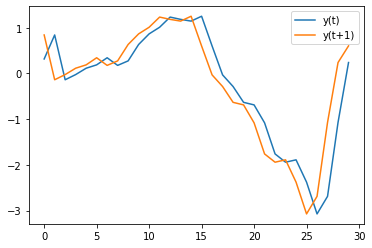

In [66]:
data_t_ = sensor["rotationRate"][:-1]
data_t_plus_1_ = sensor["rotationRate"][1:]
plt.plot(data_t_[:30].values, label="y(t)")
plt.plot(data_t_plus_1_[:30].values, label="y(t+1)")
plt.legend();

No handles with labels found to put in legend.


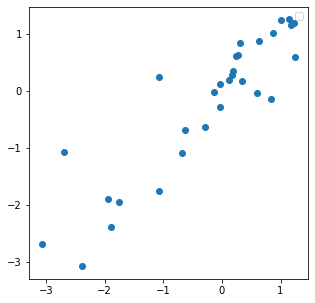

In [67]:
plt.figure(figsize=(5,5))
plt.scatter(data_t_[:30], data_t_plus_1_[:30])
plt.legend();

In [68]:
np.corrcoef(data_t_, data_t_plus_1_)

array([[1.        , 0.84709047],
       [0.84709047, 1.        ]])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

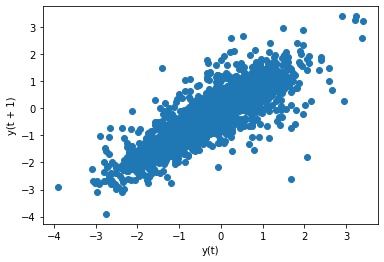

In [112]:
pd.plotting.lag_plot(sensor["rotationRate"], lag=1)

What are your conclusions from both visualizations?

The lag plot gives a linear plot, then it means the autocorrelation is present in the data, there is positive autocorrelation that depends upon the slope of the line of the dataset. More data is concentrated on the diagonal in lag plot "rotationRate", so it means there is a strong autocorrelation.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [101]:
# Your code here:
test1 = adfuller(sensor["rotationRate"])
test1

(-5.269860625086428,
 6.320230335911989e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

In [102]:
adf, pvalue, usedlag, nobs, critical_values, icbest = test1

In [103]:
# Our test statistic
adf

-5.269860625086428

In [104]:
# The critical values for different confidence intervals (How strict we are)
critical_values

{'1%': -3.4341465551936534,
 '5%': -2.863216966926812,
 '10%': -2.567662770090317}

In [105]:
pvalue

6.320230335911989e-06

In [106]:
test2 = adfuller(sensor["userAcceleration"])
test2

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [90]:
adf, pvalue, usedlag, nobs, critical_values, icbest = test2

In [91]:
# Our test statistic
adf

-17.957994086169762

In [92]:
# The critical values for different confidence intervals (How strict we are)
critical_values

{'1%': -3.434100824760071,
 '5%': -2.863196780129223,
 '10%': -2.5676520210882936}

In [74]:
pvalue

6.320230335911989e-06

What are your conclusions from this test?

### Your conclusions here:
`Test1`:
Our adf was -5, we can reject  𝐻0  being 99% sure

Since our adf is smaller than any of the critical values, we regret the null hypothesis.

Therefore, as previously seen, even on a 99% confidence level, we can affirm that our data is stationary.

Alternatively, we look at the p-value and compare it with a predefine confidence interval alpha.

p_value < alpha (0.01), we regret the null hypothesis.

`Test2`:
Our adf was -17, we can reject  𝐻0  being 99% sure

Since our adf is smaller than any of the critical values, we regret the null hypothesis.

Therefore, as previously seen, even on a 99% confidence level, we can affirm that our data is stationary.

Alternatively, we look at the p-value and compare it with a predefine confidence interval alpha.

p_value < alpha (0.01), we regret the null hypothesis.